In [210]:
# Run this cell to set up the notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

Questions:
1. Can we use "Berkeley" as a keyword every time we use the Listening tool? The majority of posts with "Cal" are just noise. (See Section 2)
2. Will we no longer cover Cal Day? Ie should I not consider it in this data set? 
3. Should I focus more on positive messages or negative messages? 
4. Should I generate reports like this one or like previous Data Studio reports? 
5. Is there a way to access listening data from before January? 

Comments:
1. In order to find user generated content for events like Cal Day or the Decision Days, we can use methods shown in Section 4. It is more efficient than Data Studio. 
2. The data allows for a variety of operations and can be shaped for any kind of analysis. 
3. The data does not include all of the information shown in Sprout Social. It might be the case that we will have to screenshot some of the graphics they display for our reports, or even use their generated pdf. 
4. The difficult part of using Listening data is that it will be difficult to discern UC Berkeley-related posts with posts related to the city Berkeley, or other sports related events.
5. None of the data is from Instagram or Reddit. 

# Summary

In this analysis, we noticed that 78% of posts did not actually contain the word "Berkeley". Instead, many of them referenced the world "Cal" as a name or sports reference. We confirmed that English was the most used language in these tweets, and noticed that the majority of tweets were sent out during 8-9 PM. We provided a list of images and links from the posts with positive sentiment and a large number of followers, in order for them to be used in the future during important events. Unfortunately, it was also pointed out that the majority of posts in this time period have been negative, most likely to the number of protests happening. 

# Section 1: Data Cleaning

In [211]:
#Dataframe with all data
twitter = pd.read_csv("ListeningInsightsCSV-2020-02-01-2020-02-29.csv")
twitter = pd.DataFrame(twitter)

In [212]:
#Dataframe with relevant information.

#Making sure all the data is from Twitter, then removing the Network column. 
twitter = twitter[[x == "Twitter" for x in twitter["Network"]]]
twitter = twitter.drop(columns = ["Network"])

In [213]:
#Setting the Date column in datetime format.
twitter["Date"] = pd.to_datetime(twitter["Date"])
twitter["Time"] = pd.to_datetime(twitter["Date"]).dt.time
twitter["Date"] = pd.to_datetime(twitter["Date"]).dt.date
twitter.head()

,Date,Message,Message URL,Message ID,Name,Username,Followers,Shares,Likes,Sentiment,Location,Hashtags,Images,Language,Time
0,2020-02-29,RT @xotwodkyra: UC Berkeley is such a good school for white people.,https://twitter.com/NIKTHEDUFFFFER/statuses/1234025520800468993,1234025520800468993,nik 🥂,NIKTHEDUFFFFER,122,0,0,Positive,"Richmond, California, United States",NaN,NaN,en,23:59:00
1,2020-02-29,Deadass all of brown twitter is at UC Berkeley rn,https://twitter.com/jagpatrola/statuses/1234025388398919681,1234025388398919681,jagga ☬,jagpatrola,320,0,0,Unrated,"Coarsegold, California, United States",NaN,NaN,en,23:59:00
2,2020-02-29,"RT @ms_self_dstruct: I graduated from UC Berkeley in 2017. I’ll never forget walking across that stage with my son. I was SO excited to continue my education at UCSC. Sadly, my son and I have suffered so much for this PhD, so I spoke up. I told the UC we’re not surviving. The...",https://twitter.com/MateoLone/statuses/1234025344245485568,1234025344245485568,Mateo Lone,MateoLone,338,0,0,Negative,"Coarsegold, California, United States",#cola4all,"https://pbs.twimg.com/media/ER7A--mUwAEKZ0T.jpg, https://pbs.twimg.com/media/ER7A--nUEAE7nsa.jpg, https://pbs.twimg.com/media/ER7A--qU8AACrXL.jpg",en,23:59:00
3,2020-02-29,_Jac_Obi_ Bye Cal.,https://twitter.com/Trazy1218/statuses/1234025284921364480,1234025284921364480,Trazy,Trazy1218,665,0,0,Unrated,"Boston, Massachusetts, United States",NaN,NaN,en,23:58:00
4,2020-02-29,actiionjaackson @LadiSDot A legend please not in Milwaukee. Thought they would said Coo coo cal or somebody https://t.co/vlH7HFlHQG,https://twitter.com/CoachGrimes1906/statuses/1234025005769527296,1234025005769527296,Coach Grimes,CoachGrimes1906,2019,0,0,Unrated,"Atlanta, Georgia, United States",NaN,https://pbs.twimg.com/tweet_video_thumb/ESAjMuKWAAEOHId.jpg,en,23:57:00


# Section 2: Cal vs Berkeley

In [214]:
#Which posts that include "cal" also talk about Berkeley.
calTable = twitter[["Message"]].astype(str)

calTable["Contains Berkeley"] = calTable["Message"].str.contains('berkeley|Berkeley', na=False, regex=True)
containsBerkeley = calTable.groupby("Contains Berkeley").count()
containsBerkeley

,Message
Contains Berkeley,
False,784
True,216


# Section 3: Languages

Table with and without "Berkeley"

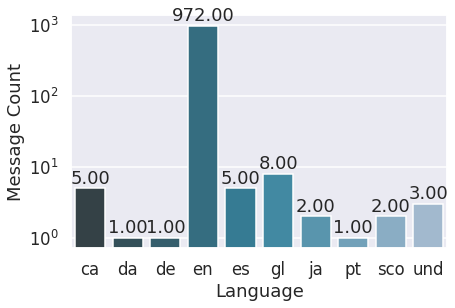

<Figure size 720x720 with 0 Axes>

In [215]:
#What are the languages used in these tweets, and how often are they used? 
languages = twitter.groupby("Language").count()
ax = sns.barplot(y = "Message", x = languages.index , data = languages, palette = "PuBuGn_d");
ax.set(ylabel = "Message Count");
ax.set_yscale("log");

plt.figure(figsize=(10, 10));
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points');

Table with "Berkeley"

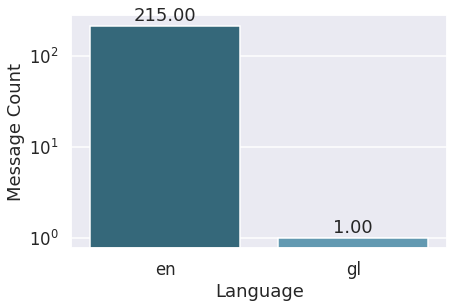

<Figure size 720x720 with 0 Axes>

In [216]:
#What are the languages used in these tweets that contain "Berkeley", and how often are they used? 
withBerkeley = twitter[twitter["Message"].str.contains('berkeley|Berkeley', na=False, regex=True)]
languages = withBerkeley.groupby("Language").count()
ax = sns.barplot(y = "Message", x = languages.index , data = languages, palette = "PuBuGn_d");
ax.set(ylabel = "Message Count");
ax.set_yscale("log");

plt.figure(figsize=(10, 10));
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points');

# Section 4: User Generated Content

In [217]:
#Posts that contain images and with positive sentiment during target days. 
#Covering only messages that contain "Berkeley" and ordering them by users with the most followers. 

ugc = withBerkeley[withBerkeley["Images"].str.len() > 3]
ugc = ugc[withBerkeley["Sentiment"] == 'Positive']
ugc = ugc[["Date", "Message URL", "Name", "Username", "Followers", "Images"]].sort_values("Followers", ascending = False)
ugc.head()


/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,Date,Message URL,Name,Username,Followers,Images
555,2020-02-29,https://twitter.com/BrenkoWeb/statuses/1233977582049275905,Brenkoweb,BrenkoWeb,4383,https://pbs.twimg.com/media/ENm9rwJUEAABMZJ.jpg
138,2020-02-29,https://twitter.com/Blaze_Sports/statuses/1234007738214076416,Blaze Sports,Blaze_Sports,1471,https://pbs.twimg.com/media/ESATd35VUAAVonN.jpg
213,2020-02-29,https://twitter.com/Fyght4Cal/statuses/1234001184165203968,Congrats CalWBBall & Charmin Smith on P12 Win #2,Fyght4Cal,899,https://pbs.twimg.com/media/ER9bE6bU8AAiXkB.jpg
219,2020-02-29,https://twitter.com/Fyght4Cal/statuses/1234000971878977538,Congrats CalWBBall & Charmin Smith on P12 Win #2,Fyght4Cal,899,https://pbs.twimg.com/media/ER99ypXVUAAN_Z3.png
221,2020-02-29,https://twitter.com/CalAlumniLA/statuses/1234000743125807104,Cal🌟Alumni of LA,CalAlumniLA,420,https://pbs.twimg.com/media/ER99ypXVUAAN_Z3.png


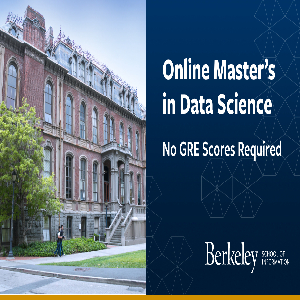

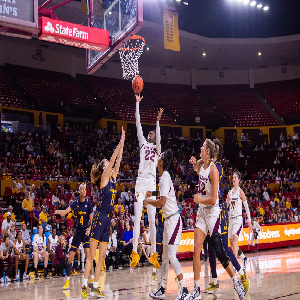

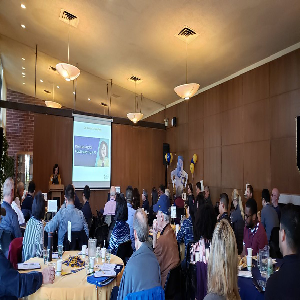

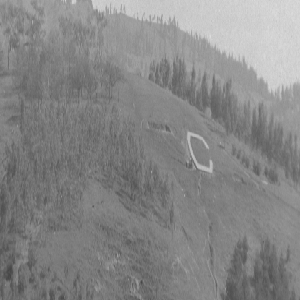

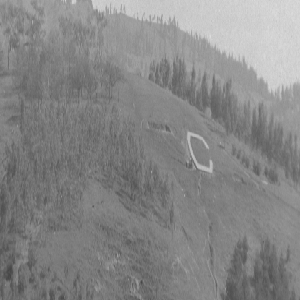

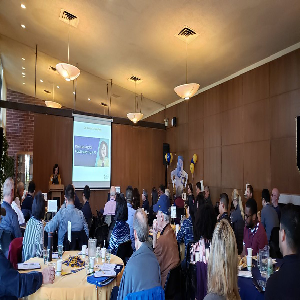

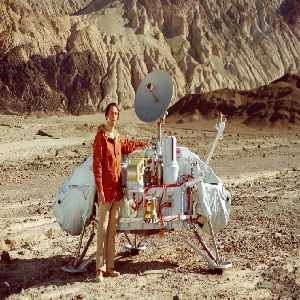

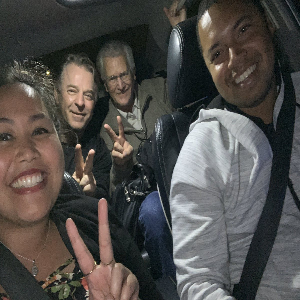

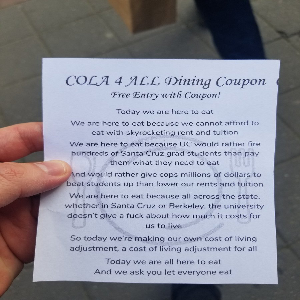

In [218]:
#Displaying the images from users with the highest followers.

from PIL import Image
import requests
from io import BytesIO

for i in ugc["Images"].head(10):
    response = requests.get(i)
    img = Image.open(BytesIO(response.content)).resize((300,300))
    display(img)



# Section 5: Positive vs Negative

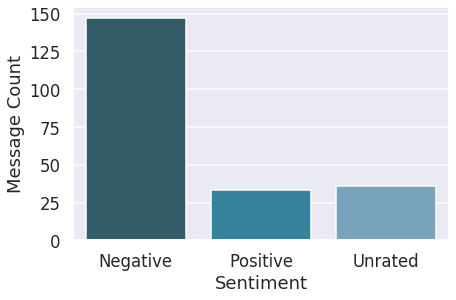

In [219]:
#Compares the number of Berkeley-related messages that are positive, negative or unrated. 
sentimentComparison = withBerkeley.groupby("Sentiment").count()
ax3 = sns.barplot(y = "Message", x = sentimentComparison.index , data = sentimentComparison, palette = "PuBuGn_d");
ax3.set(ylabel = "Message Count");

# Section 6: Times

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


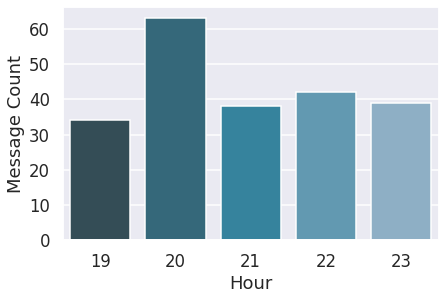

In [220]:
#What is the distribution of times that messages were posted in? 

times = withBerkeley[["Time"]]
times["Hour"] = withBerkeley["Time"].astype(str).str.split(':').str[0]
times = times.groupby("Hour").count()
ax4 = sns.barplot(x = times.index, y = "Time", data = times, palette = "PuBuGn_d")
ax4.set(ylabel = "Message Count");
